# Chapter 9: 3 Puzzle
### Qiskit 2.X 

The $3$-puzzle is composed of three numbered movable tiles in a $2 \times 2$ frame.
One cell of the frame is empty, and because of this tiles can be moved around to form different patterns. The~goal is to find a series of moves of tiles into the blank space that changes the board from the initial configuration to a desired configuration.  There are twelve possible configurations. For any of these configurations, only two movements are possible. The~movement of the empty  cell is either  a clockwise or counter-clockwise~movement. 


There are four different objects: three cells and one empty cell. Each object can be coded by  two qubits ($2^2$), and a configuration of the four objects can be represented  by a register of eight qubits $|x \rangle$. 
The object $1$  is represented by $00$,  $2$  is represented by $01$,  $3$  is represented by $10$ and empty space $x$  is represented by $11$. The~state is represented by 8 qubits  $x_{0}, x_{1}, x_{2}, x_{3}, x_{4}, x_{5}, x_{6}, x_{7} $, and the~state  of the Figure~\ref{puzzle-3} is represented by the qubits $10~11~00~01$.


In [2]:
import numpy as np
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator, Aer
from qiskit.visualization import plot_histogram
from qiskit.visualization import plot_distribution 
from qiskit.quantum_info import Statevector
from qiskit.circuit.library import MCXGate
from math import pi

In this representation, position description (adjective) is fixed and the class descriptors moves. 
In the $qiskit$  circuit, all qubits before the computation are in the state $0$, so the state of the Figure is prepared with the $NOT$ gate with the following commands of the qubits $0$ to $7$:

In [3]:
qc = QuantumCircuit(14,8)
#State Preparation 0-7
qc.x(0)
qc.x(4)
qc.x(5)
qc.x(7)
#Working Memory for Flag bit 8

#1St Trace 9-12

#1St Descriptor in superposition
qc.h(13)
qc.barrier()



CircuitInstruction(operation=Instruction(name='barrier', num_qubits=14, num_clbits=0, params=[]), qubits=(<Qubit register=(14, "q"), index=0>, <Qubit register=(14, "q"), index=1>, <Qubit register=(14, "q"), index=2>, <Qubit register=(14, "q"), index=3>, <Qubit register=(14, "q"), index=4>, <Qubit register=(14, "q"), index=5>, <Qubit register=(14, "q"), index=6>, <Qubit register=(14, "q"), index=7>, <Qubit register=(14, "q"), index=8>, <Qubit register=(14, "q"), index=9>, <Qubit register=(14, "q"), index=10>, <Qubit register=(14, "q"), index=11>, <Qubit register=(14, "q"), index=12>, <Qubit register=(14, "q"), index=13>), clbits=())

In the 3-puzzle task, we have four different rules defined by the position of the empty space. Each of the rules has two instantiations, either moving the empty space  clockwise or a counter-clockwise movement. We recognize the four rules and indicate the presence of a rule by a qubit. We use four qubits that indicate the presence of the four rules and call them the trace. We need the trace represented by the four qubits, since we cannot delete the information and we cannot un-compute  the output back. By un-computing, we would redo the rules.
Additionally, we require a flag represented by a qubit that indicates to us if the rule with the corresponding instantiation can be executed or not. Finally, we need a qubit that represents the path descriptor that will be present by superposition using a Hadamard gate. 


## Rules and Trace

The  if part of the rules is implemented by the Toffoli gate, also called the ccX gate (CCNOT gate, controlled controlled not gate), it recognizes the position of the empty space and indicates it by setting one qubit of the four qubits $9$ to $11$ to one.  

In [4]:
#If part of rules marked in trace (empty state)
qc.ccx(0,1,9)
qc.ccx(2,3,10)
qc.ccx(4,5,11)
qc.ccx(6,7,12)

qc.barrier()

CircuitInstruction(operation=Instruction(name='barrier', num_qubits=14, num_clbits=0, params=[]), qubits=(<Qubit register=(14, "q"), index=0>, <Qubit register=(14, "q"), index=1>, <Qubit register=(14, "q"), index=2>, <Qubit register=(14, "q"), index=3>, <Qubit register=(14, "q"), index=4>, <Qubit register=(14, "q"), index=5>, <Qubit register=(14, "q"), index=6>, <Qubit register=(14, "q"), index=7>, <Qubit register=(14, "q"), index=8>, <Qubit register=(14, "q"), index=9>, <Qubit register=(14, "q"), index=10>, <Qubit register=(14, "q"), index=11>, <Qubit register=(14, "q"), index=12>, <Qubit register=(14, "q"), index=13>), clbits=())

The execution of the rules uses the Fredkin gate also called controlled swap (CSWAP) gate using the trace information and the path descriptor setting the  flag qubit (qubit 8) to indicate if the rule is going to be executed. The reset is done by un-computing,  by repeating the operation to put the flag again in the state zero. We change the path descriptor by the NOT gate and execute the second instantiation  of the rule depending on the trace value, the $qc.barrier()$ will separate the representation in the circuit. 

In [5]:
#Rules

#If then rule (1) for empty at 0, 1  -> 4 , 5  or 2, 3

#Search empty state with the descriptor
qc.ccx(9,13,8)

#Execute 1st then part
qc.cswap(8,0,4)
qc.cswap(8,1,5)

#Secod then part with changed descriptor 
#Reset WM
qc.ccx(9,13,8)
#Fetch second superposition
qc.x(13)
qc.ccx(9,13,8)

#Execute 2th then part
qc.cswap(8,0,2)
qc.cswap(8,1,3)

#Reset WM
qc.ccx(9,13,8)
#Restore descriptor
qc.x(13)
qc.barrier()


#If then rule (2) for empty at 2, 3  -> 6 , 7  or 0, 1

#Search empty state with the descriptor
qc.ccx(10,13,8)

#Execute 1st then part
qc.cswap(8,2,6)
qc.cswap(8,3,7)

#Secod then part with changed descriptor 
#Reset WM
qc.ccx(10,13,8)
#Fetch second superposition
qc.x(13)
qc.ccx(10,13,8)

#Execute 2th then part
qc.cswap(8,0,2)
qc.cswap(8,1,3)

#Reset WM
qc.ccx(10,13,8)
#Restore descriptor
qc.x(13)
qc.barrier()

#If then rule (3) for empty at 4, 5  -> 6 ,7  or 0, 1

#Search empty state with the descriptor
qc.ccx(11,13,8)

#Execute 1st then part
qc.cswap(8,4,6)
qc.cswap(8,5,7)

#Secod then part with changed descriptor 
#Reset WM
qc.ccx(11,13,8)
#Fetch second superposition
qc.x(13)
qc.ccx(11,13,8)

#Execute 2th then part
qc.cswap(8,0,4)
qc.cswap(8,1,5)

#Reset WM
qc.ccx(11,13,8)
#Restore descriptor
qc.x(13)
qc.barrier()

#If then rule (4) for empty at 6, 7  -> 4 ,5  or 2, 3

#Search empty state with the descriptor
qc.ccx(12,13,8)

#Execute 1st then part
qc.cswap(8,4,6)
qc.cswap(8,5,7)

#Secod then part with changed descriptor 
#Reset WM
qc.ccx(12,13,8)
#Fetch second superposition
qc.x(13)
qc.ccx(12,13,8)

#Execute 2th then part
qc.cswap(8,2,6)
qc.cswap(8,3,7)

#Reset WM
qc.ccx(12,13,8)
#Restore descriptor
qc.x(13)

qc.barrier()

CircuitInstruction(operation=Instruction(name='barrier', num_qubits=14, num_clbits=0, params=[]), qubits=(<Qubit register=(14, "q"), index=0>, <Qubit register=(14, "q"), index=1>, <Qubit register=(14, "q"), index=2>, <Qubit register=(14, "q"), index=3>, <Qubit register=(14, "q"), index=4>, <Qubit register=(14, "q"), index=5>, <Qubit register=(14, "q"), index=6>, <Qubit register=(14, "q"), index=7>, <Qubit register=(14, "q"), index=8>, <Qubit register=(14, "q"), index=9>, <Qubit register=(14, "q"), index=10>, <Qubit register=(14, "q"), index=11>, <Qubit register=(14, "q"), index=12>, <Qubit register=(14, "q"), index=13>), clbits=())

Finally we measure the state represented by the $8$ qubits

In [6]:

qc.measure(0,0)
qc.measure(1,1)
qc.measure(2,2)
qc.measure(3,3)
qc.measure(4,4)
qc.measure(5,5)
qc.measure(6,6)
qc.measure(7,7)



print("\nCirquit depth:",qc.depth())

qc.draw(fold=130)


Cirquit depth: 43


┌───┐ ░                      ░                                            ░                                            ░ »
 q_0: ┤ X ├─░───■──────────────────░───────X────────────────────X───────────────░────────────────────────────X───────────────░─»
      └───┘ ░   │                  ░       │                    │               ░                            │               ░ »
 q_1: ──────░───■──────────────────░───────┼──X─────────────────┼──X────────────░────────────────────────────┼──X────────────░─»
            ░   │                  ░       │  │                 │  │            ░                            │  │            ░ »
 q_2: ──────░───┼────■─────────────░───────┼──┼─────────────────X──┼────────────░───────X────────────────────X──┼────────────░─»
            ░   │    │             ░       │  │                 │  │            ░       │                    │  │            ░ »
 q_3: ──────░───┼────■─────────────░───────┼──┼─────────────────┼──X────────────░───────┼──X─────────────────┼──X────────────░─»
      ┌───┐ ░   │    │             ░       │  │                 │  │            ░       │  │                 │  │            ░ »
 q_4: ┤ X ├─░───┼────┼────■────────░───────X──┼─────────────────┼──┼────────────░───────┼──┼─────────────────┼──┼────────────░─»
      ├───┤ ░   │    │    │        ░       │  │                 │  │            ░       │  │                 │  │            ░ »
 q_5: ┤ X ├─░───┼────┼────■────────░───────┼──X─────────────────┼──┼────────────░───────┼──┼─────────────────┼──┼────────────░─»
      └───┘ ░   │    │    │        ░       │  │                 │  │            ░       │  │                 │  │            ░ »
 q_6: ──────░───┼────┼────┼────■───░───────┼──┼─────────────────┼──┼────────────░───────X──┼─────────────────┼──┼────────────░─»
      ┌───┐ ░   │    │    │    │   ░       │  │                 │  │            ░       │  │                 │  │            ░ »
 q_7: ┤ X ├─░───┼────┼────┼────■───░───────┼──┼─────────────────┼──┼────────────░───────┼──X─────────────────┼──┼────────────░─»
      └───┘ ░   │    │    │    │   ░ ┌───┐ │  │ ┌───┐     ┌───┐ │  │ ┌───┐      ░ ┌───┐ │  │ ┌───┐     ┌───┐ │  │ ┌───┐      ░ »
 q_8: ──────░───┼────┼────┼────┼───░─┤ X ├─■──■─┤ X ├─────┤ X ├─■──■─┤ X ├──────░─┤ X ├─■──■─┤ X ├─────┤ X ├─■──■─┤ X ├──────░─»
            ░ ┌─┴─┐  │    │    │   ░ └─┬─┘      └─┬─┘     └─┬─┘      └─┬─┘      ░ └─┬─┘      └─┬─┘     └─┬─┘      └─┬─┘      ░ »
 q_9: ──────░─┤ X ├──┼────┼────┼───░───■──────────■─────────■──────────■────────░───┼──────────┼─────────┼──────────┼────────░─»
            ░ └───┘┌─┴─┐  │    │   ░   │          │         │          │        ░   │          │         │          │        ░ »
q_10: ──────░──────┤ X ├──┼────┼───░───┼──────────┼─────────┼──────────┼────────░───■──────────■─────────■──────────■────────░─»
            ░      └───┘┌─┴─┐  │   ░   │          │         │          │        ░   │          │         │          │        ░ »
q_11: ──────░───────────┤ X ├──┼───░───┼──────────┼─────────┼──────────┼────────░───┼──────────┼─────────┼──────────┼────────░─»
            ░           └───┘┌─┴─┐ ░   │          │         │          │        ░   │          │         │          │        ░ »
q_12: ──────░────────────────┤ X ├─░───┼──────────┼─────────┼──────────┼────────░───┼──────────┼─────────┼──────────┼────────░─»
      ┌───┐ ░                └───┘ ░   │          │  ┌───┐  │          │  ┌───┐ ░   │          │  ┌───┐  │          │  ┌───┐ ░ »
q_13: ┤ H ├─░──────────────────────░───■──────────■──┤ X ├──■──────────■──┤ X ├─░───■──────────■──┤ X ├──■──────────■──┤ X ├─░─»
      └───┘ ░                      ░                 └───┘                └───┘ ░                 └───┘                └───┘ ░ »
 c: 8/═════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════»
                                                                                                                               »
«      


Total count are: {'10010011': 506, '11100001': 518}


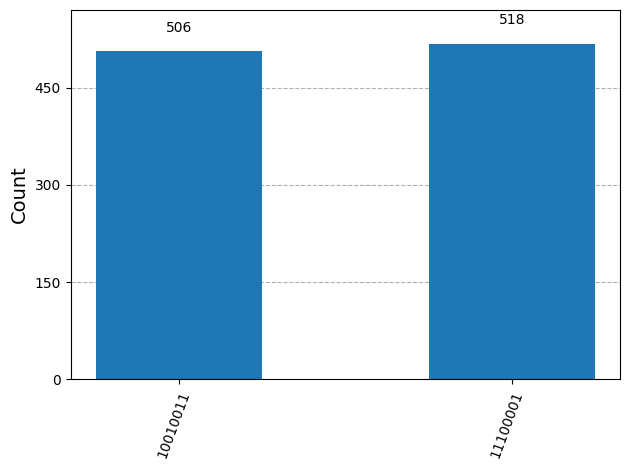

In [7]:
simulator = Aer.get_backend('qasm_simulator')
result=simulator.run(qc).result()
counts = result.get_counts()
print("\nTotal count are:",counts)
plot_histogram(counts)

Two generated new states represented by eight qubits.

## Search of Depth Two

Grover's amplification cannot be applied to fewer than four states. A search of depth one for the 3-puzzle  results in two states and 
a search of depth two in four states.
The operator $L(2)$ that describes the search of depth  two   is represented as

\begin{equation}
 L(2) \cdot |m_2, m_1 \rangle  |x \rangle =|m_2, m_1 \rangle | \gamma \rangle, 
\end{equation}

A search of depth three is described by a path descriptor of three qubits. The Grover amplification act on the qubits 13, 18 and 23 that describe the path descriptor resulting in eight states.

In [8]:
qc = QuantumCircuit(20,2)

#State Preparation 0-7
#Working Memory for Flag bit 8
#1St Trace 9-12
#1St Descriptor in superposition
qc.h(13)
#1St Trace 14-17
#2th Descriptor in superposition
qc.h(18)
#Aux Bit
qc.x(19)
qc.h(19)

qc.barrier()

CircuitInstruction(operation=Instruction(name='barrier', num_qubits=20, num_clbits=0, params=[]), qubits=(<Qubit register=(20, "q"), index=0>, <Qubit register=(20, "q"), index=1>, <Qubit register=(20, "q"), index=2>, <Qubit register=(20, "q"), index=3>, <Qubit register=(20, "q"), index=4>, <Qubit register=(20, "q"), index=5>, <Qubit register=(20, "q"), index=6>, <Qubit register=(20, "q"), index=7>, <Qubit register=(20, "q"), index=8>, <Qubit register=(20, "q"), index=9>, <Qubit register=(20, "q"), index=10>, <Qubit register=(20, "q"), index=11>, <Qubit register=(20, "q"), index=12>, <Qubit register=(20, "q"), index=13>, <Qubit register=(20, "q"), index=14>, <Qubit register=(20, "q"), index=15>, <Qubit register=(20, "q"), index=16>, <Qubit register=(20, "q"), index=17>, <Qubit register=(20, "q"), index=18>, <Qubit register=(20, "q"), index=19>), clbits=())

We define four possible initial states

In [9]:
def state_A():
    qc = QuantumCircuit(8)
    #State Preparation 0-7
    qc.x(0)
    qc.x(4)
    qc.x(5)
    qc.x(7)
    qc.name="St_A"
    return qc

In [10]:
def state_B():
    qc = QuantumCircuit(8)
    #State Preparation 0-7
    qc.x(0)
    qc.x(5)
    qc.x(6)
    qc.x(7)
    qc.name="St_B"
    return qc

In [11]:
def state_C():
    qc = QuantumCircuit(8)
    #State Preparation 0-7
    qc.x(0)
    qc.x(1)
    qc.x(4)
    qc.x(7)
    qc.name="St_C"
    return qc

In [12]:
def state_D():
    qc = QuantumCircuit(8)
    #State Preparation 0-7
    qc.x(0)
    qc.x(2)
    qc.x(3)
    qc.x(5)
    qc.name="St_D"
    return qc

We define rules for the depth one and rules for the depth two using  the $qiskit$ $def$ function

In [13]:
def rules1():
    
    qc = QuantumCircuit(14)

    #If part of rules marked in trace (empty state)
    qc.ccx(0,1,9)
    qc.ccx(2,3,10)
    qc.ccx(4,5,11)
    qc.ccx(6,7,12)

    qc.barrier()

    #Rules

    #If then rule (1) for empty at 0, 1  -> 4 , 5  or 2, 3

    #Search empty state with the descriptor
    qc.ccx(9,13,8)

    #Execute 1st then part
    qc.cswap(8,0,4)
    qc.cswap(8,1,5)

    #Secod then part with changed descriptor 
    #Reset WM
    qc.ccx(9,13,8)
    #Fetch second superposition
    qc.x(13)
    qc.ccx(9,13,8)

    #Execute 2th then part
    qc.cswap(8,0,2)
    qc.cswap(8,1,3)

    #Reset WM
    qc.ccx(9,13,8)
    #Restore descriptor
    qc.x(13)
    qc.barrier()


    #If then rule (2) for empty at 2, 3  -> 6 , 7  or 0, 1

    #Search empty state with the descriptor
    qc.ccx(10,13,8)

    #Execute 1st then part
    qc.cswap(8,2,6)
    qc.cswap(8,3,7)

    #Secod then part with changed descriptor 
    #Reset WM
    qc.ccx(10,13,8)
    #Fetch second superposition
    qc.x(13)
    qc.ccx(10,13,8)

    #Execute 2th then part
    qc.cswap(8,0,2)
    qc.cswap(8,1,3)

    #Reset WM
    qc.ccx(10,13,8)
    #Restore descriptor
    qc.x(13)
    qc.barrier()

    #If then rule (3) for empty at 4, 5  -> 6 ,7  or 0, 1

    #Search empty state with the descriptor
    qc.ccx(11,13,8)

    #Execute 1st then part
    qc.cswap(8,4,6)
    qc.cswap(8,5,7)

    #Secod then part with changed descriptor 
    #Reset WM
    qc.ccx(11,13,8)
    #Fetch second superposition
    qc.x(13)
    qc.ccx(11,13,8)

    #Execute 2th then part
    qc.cswap(8,0,4)
    qc.cswap(8,1,5)

    #Reset WM
    qc.ccx(11,13,8)
    #Restore descriptor
    qc.x(13)
    qc.barrier()

    #If then rule (4) for empty at 6, 7  -> 4 ,5  or 2, 3

    #Search empty state with the descriptor
    qc.ccx(12,13,8)

    #Execute 1st then part
    qc.cswap(8,4,6)
    qc.cswap(8,5,7)

    #Secod then part with changed descriptor 
    #Reset WM
    qc.ccx(12,13,8)
    #Fetch second superposition
    qc.x(13)
    qc.ccx(12,13,8)

    #Execute 2th then part
    qc.cswap(8,2,6)
    qc.cswap(8,3,7)

    #Reset WM
    qc.ccx(12,13,8)
    #Restore descriptor
    qc.x(13)

    qc.name="R1"
    return qc

In [14]:
def rules2():
    
    qc = QuantumCircuit(19)

    #If part of rules marked in trace (empty state)
    qc.ccx(0,1,14)
    qc.ccx(2,3,15)
    qc.ccx(4,5,16)
    qc.ccx(6,7,17)

    qc.barrier()

    #Rules

    #If then rule (1) for empty at 0, 1  -> 4 , 5  or 2, 3

    #Search empty state with the descriptor
    qc.ccx(14,18,8)

    #Execute 1st then part
    qc.cswap(8,0,4)
    qc.cswap(8,1,5)

    #Secod then part with changed descriptor 
    #Reset WM
    qc.ccx(14,18,8)
    #Fetch second superposition
    qc.x(18)
    qc.ccx(14,18,8)

    #Execute 2th then part
    qc.cswap(8,0,2)
    qc.cswap(8,1,3)

    #Reset WM
    qc.ccx(14,18,8)
    #Restore descriptor
    qc.x(18)
    qc.barrier()


    #If then rule (2) for empty at 2, 3  -> 6 , 7  or 0, 1

    #Search empty state with the descriptor
    qc.ccx(15,18,8)

    #Execute 1st then part
    qc.cswap(8,2,6)
    qc.cswap(8,3,7)

    #Secod then part with changed descriptor 
    #Reset WM
    qc.ccx(15,18,8)
    #Fetch second superposition
    qc.x(18)
    qc.ccx(15,18,8)

    #Execute 2th then part
    qc.cswap(8,0,2)
    qc.cswap(8,1,3)

    #Reset WM
    qc.ccx(15,18,8)
    #Restore descriptor
    qc.x(18)
    qc.barrier()

    #If then rule (3) for empty at 4, 5  -> 6 ,7  or 0, 1

    #Search empty state with the descriptor
    qc.ccx(16,18,8)

    #Execute 1st then part
    qc.cswap(8,4,6)
    qc.cswap(8,5,7)

    #Secod then part with changed descriptor 
    #Reset WM
    qc.ccx(16,18,8)
    #Fetch second superposition
    qc.x(18)
    qc.ccx(16,18,8)

    #Execute 2th then part
    qc.cswap(8,0,4)
    qc.cswap(8,1,5)

    #Reset WM
    qc.ccx(16,18,8)
    #Restore descriptor
    qc.x(18)
    qc.barrier()

    #If then rule (4) for empty at 6, 7  -> 4 ,5  or 2, 3

    #Search empty state with the descriptor
    qc.ccx(17,18,8)

    #Execute 1st then part
    qc.cswap(8,4,6)
    qc.cswap(8,5,7)

    #Secod then part with changed descriptor 
    #Reset WM
    qc.ccx(17,18,8)
    #Fetch second superposition
    qc.x(18)
    qc.ccx(17,18,8)

    #Execute 2th then part
    qc.cswap(8,2,6)
    qc.cswap(8,3,7)

    #Reset WM
    qc.ccx(17,18,8)
    #Restore descriptor
    qc.x(18)

    qc.name="R2"
    return qc

In the following we will use the qiskit $def$ function to define the oracle using the $MCXGate$ command. The $MCXGate$ is a  multi-controlled X (Toffoli) gate.
A  multi-controlled X gate is composed in of simple (Toffoli) gate and temporary work registers. It is represented in the qiskit  circuit library.

In [15]:
def oracle():
    qc = QuantumCircuit(20)
    
    
    #Check the postion of the empty space
    #qc.ccx(2,3,19)

    gate = MCXGate(4)

    
    #Configurations
    qc.append(gate,[0, 2, 3, 5, 19])

    #qc.append(gate,[2, 3, 4, 7, 19])

    #Grover in depth two cannot resolve this!
    #qc.append(gate,[0, 4, 5, 7, 19])



    qc.name="O"
    return qc

In quantum computation it is not possible to reset the information  to the pattern representing the initial state. Instead we  un-compute the output back to the input before applying the amplification step of the Grover's algorithm. Because of the unitary evolution it follows that 
\begin{equation}
 \left( (L(t)  \otimes    I_1)^* \right) ^t  \cdot   (I_t  \otimes  T) \cdot  (L(t)  \otimes    I_1) ^t  \cdot    | \kappa^t ,  x , c \rangle
\end{equation}
the computation can be undone and the corresponding path is marked by a negative sign using the auxiliary qubit  $c$.

We use the qiskit inverse command $inverse()$ to perform the inverse operation

In [16]:
def rules1_inv():
    qc=rules1()
    qc_inv=qc.inverse()
    qc_inv.name="R1†"
    return qc_inv

In [17]:
def rules2_inv():
    qc=rules2()
    qc_inv=qc.inverse()
    qc_inv.name="R2†"
    return qc_inv

The Grover's amplification is applied to the two  qubits $13$ and $16$ representing the path descriptor

In [18]:
def Grover():
    qc = QuantumCircuit(19)
    #Diffusor
    qc.h([13,18])
    qc.z([13,18])
    qc.cz(13,18)
    qc.h([13,18])

    qc.name="G"
    return qc


The quantum circuit using the defined functions is represented as

In [19]:
qc = QuantumCircuit(20,2)

#State Preparation 0-7
#Working Memory for Flag bit 8
#1St Trace 9-12
#1St Descriptor in superposition
qc.h(13)
#1St Trace 14-17
#2th Descriptor in superposition
qc.h(18)
#Aux Bit
qc.x(19)
qc.h(19)

qc.barrier()

#Preperation
qc.append(state_A(),range(8))
#Depth1
qc.append(rules1(),range(14))
#Depth2
qc.append(rules2(),range(19))
#Oracle
qc.append(oracle(),range(20))
#Depth2
qc.append(rules2_inv(),range(19))
#Depth1
qc.append(rules1_inv(),range(14))
#Redo Preperation
qc.append(state_A(),range(8))

qc.barrier()

#Redo Aux Bit
qc.h(19)

qc.barrier()

qc.append(Grover(),range(19))

qc.measure(13,0)
qc.measure(18,1)


print("\nCirquit depth:",qc.depth())

#qc.draw()

qc.draw(fold=130)


Cirquit depth: 12


░ ┌───────┐┌──────┐┌──────┐┌─────┐┌───────┐┌───────┐┌───────┐ ░       ░ ┌─────┐      
 q_0: ───────────░─┤0      ├┤0     ├┤0     ├┤0    ├┤0      ├┤0      ├┤0      ├─░───────░─┤0    ├──────
                 ░ │       ││      ││      ││     ││       ││       ││       │ ░       ░ │     │      
 q_1: ───────────░─┤1      ├┤1     ├┤1     ├┤1    ├┤1      ├┤1      ├┤1      ├─░───────░─┤1    ├──────
                 ░ │       ││      ││      ││     ││       ││       ││       │ ░       ░ │     │      
 q_2: ───────────░─┤2      ├┤2     ├┤2     ├┤2    ├┤2      ├┤2      ├┤2      ├─░───────░─┤2    ├──────
                 ░ │       ││      ││      ││     ││       ││       ││       │ ░       ░ │     │      
 q_3: ───────────░─┤3      ├┤3     ├┤3     ├┤3    ├┤3      ├┤3      ├┤3      ├─░───────░─┤3    ├──────
                 ░ │  St_A ││      ││      ││     ││       ││       ││  St_A │ ░       ░ │     │      
 q_4: ───────────░─┤4      ├┤4     ├┤4     ├┤4    ├┤4      ├┤4      ├┤4      ├─░───────░─┤4    ├──────
                 ░ │       ││      ││      ││     ││       ││       ││       │ ░       ░ │     │      
 q_5: ───────────░─┤5      ├┤5     ├┤5     ├┤5    ├┤5      ├┤5      ├┤5      ├─░───────░─┤5    ├──────
                 ░ │       ││      ││      ││     ││       ││       ││       │ ░       ░ │     │      
 q_6: ───────────░─┤6      ├┤6     ├┤6     ├┤6    ├┤6      ├┤6      ├┤6      ├─░───────░─┤6    ├──────
                 ░ │       ││   R1 ││      ││     ││       ││   R1† ││       │ ░       ░ │     │      
 q_7: ───────────░─┤7      ├┤7     ├┤7     ├┤7    ├┤7      ├┤7      ├┤7      ├─░───────░─┤7    ├──────
                 ░ └───────┘│      ││      ││     ││       ││       │└───────┘ ░       ░ │     │      
 q_8: ───────────░──────────┤8     ├┤8     ├┤8    ├┤8      ├┤8      ├──────────░───────░─┤8    ├──────
                 ░          │      ││      ││     ││       ││       │          ░       ░ │     │      
 q_9: ───────────░──────────┤9     ├┤9  R2 ├┤9    ├┤9  R2† ├┤9      ├──────────░───────░─┤9  G ├──────
                 ░          │      ││      ││   O ││       ││       │          ░       ░ │     │      
q_10: ───────────░──────────┤10    ├┤10    ├┤10   ├┤10     ├┤10     ├──────────░───────░─┤10   ├──────
                 ░          │      ││      ││     ││       ││       │          ░       ░ │     │      
q_11: ───────────░──────────┤11    ├┤11    ├┤11   ├┤11     ├┤11     ├──────────░───────░─┤11   ├──────
                 ░          │      ││      ││     ││       ││       │          ░       ░ │     │      
q_12: ───────────░──────────┤12    ├┤12    ├┤12   ├┤12     ├┤12     ├──────────░───────░─┤12   ├──────
      ┌───┐      ░          │      ││      ││     ││       ││       │          ░       ░ │     │┌─┐   
q_13: ┤ H ├──────░──────────┤13    ├┤13    ├┤13   ├┤13     ├┤13     ├──────────░───────░─┤13   ├┤M├───
      └───┘      ░          └──────┘│      ││     ││       │└───────┘          ░       ░ │     │└╥┘   
q_14: ───────────░──────────────────┤14    ├┤14   ├┤14     ├───────────────────░───────░─┤14   ├─╫────
                 ░                  │      ││     ││       │                   ░       ░ │     │ ║    
q_15: ───────────░──────────────────┤15    ├┤15   ├┤15     ├───────────────────░───────░─┤15   ├─╫────
                 ░                  │      ││     ││       │                   ░       ░ │     │ ║    
q_16: ───────────░──────────────────┤16    ├┤16   ├┤16     ├───────────────────░───────░─┤16   ├─╫────
                 ░                  │      ││     ││       │                   ░       ░ │     │ ║    
q_17: ───────────░──────────────────┤17    ├┤17   ├┤17     ├───────────────────░───────░─┤17   ├─╫────
      ┌───┐      ░                  │      ││     ││       │                   ░       ░ │     │ ║ ┌─┐
q_18: ┤ H ├──────░──────────────────┤18    ├┤18   ├┤18     ├───────────────────░───────░─┤18   ├─╫─┤M├
      ├───┤┌───┐ ░                  └──────┘│     │└───────┘                   ░ ┌───┐ ░ └─────┘ ║ └╥┘


The quantum circuit of 3-puzzle task of the depth search $2$. The circuits depth in the number of quantum gates is $12$ The path descriptor has four possible states represented by two qubits. One marked state results in a certain solution $01$ after one iteration, since for one marked qubit one requires only one rotation.


Total count are: {'01': 1024}


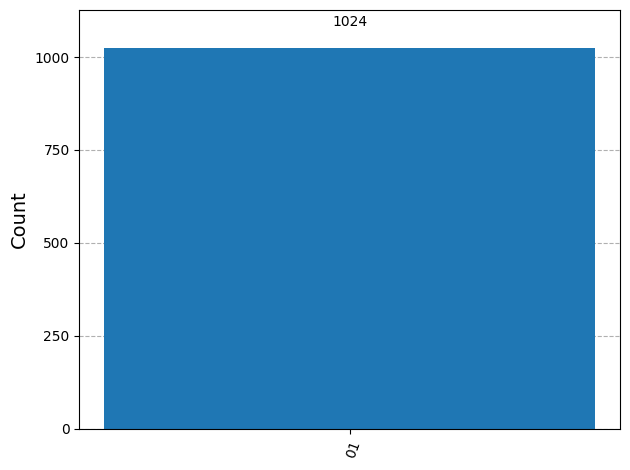

In [20]:
simulator = Aer.get_backend('qasm_simulator')
result=simulator.run(qc.decompose()).result()
counts = result.get_counts()
print("\nTotal count are:",counts)
plot_histogram(counts)

## Search of Depth Three

A search of depth three is described by a path descriptor of three qubits.

In [21]:
def rules3():
    
    qc = QuantumCircuit(24)

    #If part of rules marked in trace (empty state)
    qc.ccx(0,1,19)
    qc.ccx(2,3,20)
    qc.ccx(4,5,21)
    qc.ccx(6,7,22)

    qc.barrier()

    #Rules

    #If then rule (1) for empty at 0, 1  -> 4 , 5  or 2, 3

    #Search empty state with the descriptor
    qc.ccx(19,23,8)

    #Execute 1st then part
    qc.cswap(8,0,4)
    qc.cswap(8,1,5)

    #Secod then part with changed descriptor 
    #Reset WM
    qc.ccx(19,23,8)
    #Fetch second superposition
    qc.x(23)
    qc.ccx(19,23,8)

    #Execute 2th then part
    qc.cswap(8,0,2)
    qc.cswap(8,1,3)

    #Reset WM
    qc.ccx(19,23,8)
    #Restore descriptor
    qc.x(23)
    qc.barrier()


    #If then rule (2) for empty at 2, 3  -> 6 , 7  or 0, 1

    #Search empty state with the descriptor
    qc.ccx(20,23,8)

    #Execute 1st then part
    qc.cswap(8,2,6)
    qc.cswap(8,3,7)

    #Secod then part with changed descriptor 
    #Reset WM
    qc.ccx(20,23,8)
    #Fetch second superposition
    qc.x(23)
    qc.ccx(20,23,8)

    #Execute 2th then part
    qc.cswap(8,0,2)
    qc.cswap(8,1,3)

    #Reset WM
    qc.ccx(20,23,8)
    #Restore descriptor
    qc.x(23)
    qc.barrier()

    #If then rule (3) for empty at 4, 5  -> 6 ,7  or 0, 1

    #Search empty state with the descriptor
    qc.ccx(21,23,8)

    #Execute 1st then part
    qc.cswap(8,4,6)
    qc.cswap(8,5,7)

    #Secod then part with changed descriptor 
    #Reset WM
    qc.ccx(21,23,8)
    #Fetch second superposition
    qc.x(23)
    qc.ccx(21,23,8)

    #Execute 2th then part
    qc.cswap(8,0,4)
    qc.cswap(8,1,5)

    #Reset WM
    qc.ccx(21,23,8)
    #Restore descriptor
    qc.x(23)
    qc.barrier()

    #If then rule (4) for empty at 6, 7  -> 4 ,5  or 2, 3

    #Search empty state with the descriptor
    qc.ccx(22,23,8)

    #Execute 1st then part
    qc.cswap(8,4,6)
    qc.cswap(8,5,7)

    #Secod then part with changed descriptor 
    #Reset WM
    qc.ccx(22,23,8)
    #Fetch second superposition
    qc.x(23)
    qc.ccx(22,23,8)

    #Execute 2th then part
    qc.cswap(8,2,6)
    qc.cswap(8,3,7)

    #Reset WM
    qc.ccx(22,23,8)
    #Restore descriptor
    qc.x(23)

    qc.name="R3"
    return qc

In [22]:
def oracle():
    qc = QuantumCircuit(25)
    
    
    #Check the postion of the empty space
    #qc.ccx(2,3,19)

    gate = MCXGate(4)

    
    #Configurations
    

    qc.append(gate,[0, 1, 2, 5, 24])

    #qc.append(gate,[3, 4, 6, 7, 24])
    #Grover in depth two cannot resolve this!
    #qc.append(gate,[0, 5, 6, 7, 24])

    #qc.append(gate,[0, 1, 4, 7, 24])

    qc.name="O"
    return qc

In [23]:
def rules3_inv():
    qc=rules3()
    qc_inv=qc.inverse()
    qc_inv.name="R3†"
    return qc_inv

The Grover amplification act on the qubits 13, 18 and 23 that describe the path descriptor resulting in eight states.

In [24]:
def Grover():
    qc = QuantumCircuit(24)
    #Diffusor

    qc.barrier()
    qc.h([13,18,23])
    qc.x([13,18,23])
    qc.h(13)
    qc.ccx(18,23,13)
    qc.h(13)
    qc.barrier()
    qc.x([13,18,23])
    qc.h([13,18,23])
    #Corrrect the sign, not required...
    qc.rz(2*pi,0)
    qc.rz(2*pi,1)
    qc.rz(2*pi,2)
    
    qc.name="G"
    return qc

In [25]:
qc = QuantumCircuit(25)

#State Preparation 0-7
#Working Memory for Flag bit 8
#1St Trace 9-12
#1St Descriptor in superposition
qc.h(13)
#1St Trace 14-17
#2th Descriptor in superposition
qc.h(18)
#1St Trace 19-22
#2th Descriptor in superposition
qc.h(23)
#Aux Bit
qc.x(24)
qc.h(24)
qc.barrier()

qc.append(state_A(),range(8))
#Depth1
qc.append(rules1(),range(14))
#Depth2
qc.append(rules2(),range(19))
#Depth3
qc.append(rules3(),range(24))
#Oracle
qc.append(oracle(),range(25))
#Depth 3
qc.append(rules3_inv(),range(24))
#Depth2
qc.append(rules2_inv(),range(19))
#Depth1
qc.append(rules1_inv(),range(14))
#Redo Preperation
qc.append(state_A(),range(8))


qc.barrier()


#Redo Aux Bit
qc.h(24)

qc.barrier()

qc.append(Grover(),range(24))

print("\nCirquit depth:",qc.depth())

#qc.draw()

qc.draw(fold=130)


Cirquit depth: 13


░ ┌───────┐┌──────┐┌──────┐┌──────┐┌─────┐┌───────┐┌───────┐┌───────┐┌───────┐ ░       ░ ┌─────┐
 q_0: ───────────░─┤0      ├┤0     ├┤0     ├┤0     ├┤0    ├┤0      ├┤0      ├┤0      ├┤0      ├─░───────░─┤0    ├
                 ░ │       ││      ││      ││      ││     ││       ││       ││       ││       │ ░       ░ │     │
 q_1: ───────────░─┤1      ├┤1     ├┤1     ├┤1     ├┤1    ├┤1      ├┤1      ├┤1      ├┤1      ├─░───────░─┤1    ├
                 ░ │       ││      ││      ││      ││     ││       ││       ││       ││       │ ░       ░ │     │
 q_2: ───────────░─┤2      ├┤2     ├┤2     ├┤2     ├┤2    ├┤2      ├┤2      ├┤2      ├┤2      ├─░───────░─┤2    ├
                 ░ │       ││      ││      ││      ││     ││       ││       ││       ││       │ ░       ░ │     │
 q_3: ───────────░─┤3      ├┤3     ├┤3     ├┤3     ├┤3    ├┤3      ├┤3      ├┤3      ├┤3      ├─░───────░─┤3    ├
                 ░ │  St_A ││      ││      ││      ││     ││       ││       ││       ││  St_A │ ░       ░ │     │
 q_4: ───────────░─┤4      ├┤4     ├┤4     ├┤4     ├┤4    ├┤4      ├┤4      ├┤4      ├┤4      ├─░───────░─┤4    ├
                 ░ │       ││      ││      ││      ││     ││       ││       ││       ││       │ ░       ░ │     │
 q_5: ───────────░─┤5      ├┤5     ├┤5     ├┤5     ├┤5    ├┤5      ├┤5      ├┤5      ├┤5      ├─░───────░─┤5    ├
                 ░ │       ││      ││      ││      ││     ││       ││       ││       ││       │ ░       ░ │     │
 q_6: ───────────░─┤6      ├┤6     ├┤6     ├┤6     ├┤6    ├┤6      ├┤6      ├┤6      ├┤6      ├─░───────░─┤6    ├
                 ░ │       ││   R1 ││      ││      ││     ││       ││       ││   R1† ││       │ ░       ░ │     │
 q_7: ───────────░─┤7      ├┤7     ├┤7     ├┤7     ├┤7    ├┤7      ├┤7      ├┤7      ├┤7      ├─░───────░─┤7    ├
                 ░ └───────┘│      ││      ││      ││     ││       ││       ││       │└───────┘ ░       ░ │     │
 q_8: ───────────░──────────┤8     ├┤8     ├┤8     ├┤8    ├┤8      ├┤8      ├┤8      ├──────────░───────░─┤8    ├
                 ░          │      ││      ││      ││     ││       ││       ││       │          ░       ░ │     │
 q_9: ───────────░──────────┤9     ├┤9  R2 ├┤9     ├┤9    ├┤9      ├┤9  R2† ├┤9      ├──────────░───────░─┤9    ├
                 ░          │      ││      ││      ││     ││       ││       ││       │          ░       ░ │     │
q_10: ───────────░──────────┤10    ├┤10    ├┤10    ├┤10   ├┤10     ├┤10     ├┤10     ├──────────░───────░─┤10   ├
                 ░          │      ││      ││      ││     ││       ││       ││       │          ░       ░ │     │
q_11: ───────────░──────────┤11    ├┤11    ├┤11    ├┤11   ├┤11     ├┤11     ├┤11     ├──────────░───────░─┤11   ├
                 ░          │      ││      ││   R3 ││     ││   R3† ││       ││       │          ░       ░ │   G │
q_12: ───────────░──────────┤12    ├┤12    ├┤12    ├┤12 O ├┤12     ├┤12     ├┤12     ├──────────░───────░─┤12   ├
      ┌───┐      ░          │      ││      ││      ││     ││       ││       ││       │          ░       ░ │     │
q_13: ┤ H ├──────░──────────┤13    ├┤13    ├┤13    ├┤13   ├┤13     ├┤13     ├┤13     ├──────────░───────░─┤13   ├
      └───┘      ░          └──────┘│      ││      ││     ││       ││       │└───────┘          ░       ░ │     │
q_14: ───────────░──────────────────┤14    ├┤14    ├┤14   ├┤14     ├┤14     ├───────────────────░───────░─┤14   ├
                 ░                  │      ││      ││     ││       ││       │                   ░       ░ │     │
q_15: ───────────░──────────────────┤15    ├┤15    ├┤15   ├┤15     ├┤15     ├───────────────────░───────░─┤15   ├
                 ░                  │      ││      ││     ││       ││       │                   ░       ░ │     │
q_16: ───────────░──────────────────┤16    ├┤16    ├┤16   ├┤16     ├┤16     ├───────────────────░───────░─┤16   ├
                 ░                  │      ││      ││     ││       ││       │                   ░       ░ │     │
q_17: ───────────░─────────

The quantum circuit for the 3-puzzle task of the depth search $3$. Since we are using the  statevector simulator, we do not need any measurement since the simulator determines the exact probabilities of each qubit.  The circuits depth in the number of quantum gates is $13$


Total count are: {np.str_('1000000000000000000000000'): np.float64(0.03125), np.str_('1000000000010000000000000'): np.float64(0.78125), np.str_('1000001000000000000000000'): np.float64(0.03125), np.str_('1000001000010000000000000'): np.float64(0.03125), np.str_('1100000000000000000000000'): np.float64(0.03125), np.str_('1100000000010000000000000'): np.float64(0.03125), np.str_('1100001000000000000000000'): np.float64(0.03125), np.str_('1100001000010000000000000'): np.float64(0.03125)}


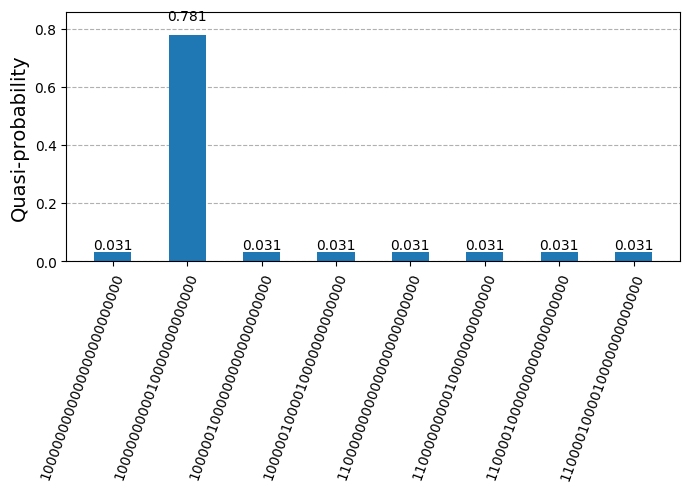

In [26]:
simulator = Aer.get_backend('statevector_simulator')
result=simulator.run(qc.decompose()).result()
counts = result.get_counts()
print("\nTotal count are:",counts)
plot_distribution(counts)

One marked state resulted  after one iteration is indicated with a probability value $0.781$ and the  path descriptor $001$ represented by the qubits $13$, $18$ and $23$. All other states are zero due to un-computation

## Search of Depth Three with two Iterations

We apply the $U_{3-puzzle} $ operator ignoring the trace for simplicity for the depth $t$ resulting in $2^t$ states represented by the path descriptor
\begin{equation}
U_{3-puzzle}= \left( (L(t)  \otimes    I_1)^* \right) ^t  \cdot   (I_t  \otimes  T) \cdot  (L(t)  \otimes    I_1) ^t  
\end{equation}

With Grover amplification on $t$ qubits representing the path descriptor  by the unitary operator $G_t$
\begin{equation}
\Gamma_t:=(G_t \otimes I_{10}) \cdot U_{3-puzzle}. 
\end{equation}

With  $r$ iterations
\begin{equation}
\Gamma_t^r =  \prod_{t=1}^r \Gamma_t  \ 
\end{equation}
and determine the solution by the measurement of the register that represents the path descriptor. In our case $t=3$ and $r=2$, with $\Gamma_3^2$

he quantum circuit for the 3-puzzle task of the depth search three with two iterations. Since we are using $statevector$ simulator we do not need any measurement since the simulator determines the exact probabilities of each qubit.  The circuits depth in the number of quantum gates is $25$. The path descriptor has eight possible states represented by three qubits.  An important operation before the second iteration is the setting of the auxiliary qubit $24$  in superposition by a Hadamard gate. We could simplify the circuit by eliminating the two Hadamard  gates of  the auxiliary qubit $24$ after the first  and second iteration, however by doing so the circuit loses its modular structure  (less readable) and the redundant operations are simplified during the transpiration process. 

In [27]:
qc = QuantumCircuit(25)

#State Preparation 0-7
#Working Memory for Flag bit 8
#1St Trace 9-12
#1St Descriptor in superposition
qc.h(13)
#1St Trace 14-17
#2th Descriptor in superposition
qc.h(18)
#1St Trace 19-22
#2th Descriptor in superposition
qc.h(23)
#Aux Bit
qc.x(24)
qc.h(24)
qc.barrier()

qc.append(state_A(),range(8))
#Depth1
qc.append(rules1(),range(14))
#Depth2
qc.append(rules2(),range(19))
#Depth3
qc.append(rules3(),range(24))
#Oracle
qc.append(oracle(),range(25))
#Depth 3
qc.append(rules3_inv(),range(24))
#Depth2
qc.append(rules2_inv(),range(19))
#Depth1
qc.append(rules1_inv(),range(14))
#Redo Preperation
qc.append(state_A(),range(8))

qc.barrier()

#Redo Aux Bit
qc.h(24)

qc.barrier()

qc.append(Grover(),range(24))

qc.barrier()

#Second Iteration!!!!

#Aux Bit in Superposition
qc.h(24)
qc.barrier()

qc.append(state_A(),range(8))
#Depth1
qc.append(rules1(),range(14))
#Depth2
qc.append(rules2(),range(19))
#Depth3
qc.append(rules3(),range(24))
#Oracle
qc.append(oracle(),range(25))
#Depth 3
qc.append(rules3_inv(),range(24))
#Depth2
qc.append(rules2_inv(),range(19))
#Depth1
qc.append(rules1_inv(),range(14))
#Redo Preperation
qc.append(state_A(),range(8))

qc.barrier()

#Redo Aux Bit
qc.h(24)

qc.barrier()

qc.append(Grover(),range(24))


print("\nCirquit depth:",qc.depth())

#qc.draw()

qc.draw(fold=220)


Cirquit depth: 25


░ ┌───────┐┌──────┐┌──────┐┌──────┐┌─────┐┌───────┐┌───────┐┌───────┐┌───────┐ ░       ░ ┌─────┐ ░       ░ ┌───────┐┌──────┐┌──────┐┌──────┐┌─────┐┌───────┐┌───────┐┌───────┐┌───────┐ ░       ░ ┌─────┐
 q_0: ───────────░─┤0      ├┤0     ├┤0     ├┤0     ├┤0    ├┤0      ├┤0      ├┤0      ├┤0      ├─░───────░─┤0    ├─░───────░─┤0      ├┤0     ├┤0     ├┤0     ├┤0    ├┤0      ├┤0      ├┤0      ├┤0      ├─░───────░─┤0    ├
                 ░ │       ││      ││      ││      ││     ││       ││       ││       ││       │ ░       ░ │     │ ░       ░ │       ││      ││      ││      ││     ││       ││       ││       ││       │ ░       ░ │     │
 q_1: ───────────░─┤1      ├┤1     ├┤1     ├┤1     ├┤1    ├┤1      ├┤1      ├┤1      ├┤1      ├─░───────░─┤1    ├─░───────░─┤1      ├┤1     ├┤1     ├┤1     ├┤1    ├┤1      ├┤1      ├┤1      ├┤1      ├─░───────░─┤1    ├
                 ░ │       ││      ││      ││      ││     ││       ││       ││       ││       │ ░       ░ │     │ ░       ░ │       ││      ││      ││      ││     ││       ││       ││       ││       │ ░       ░ │     │
 q_2: ───────────░─┤2      ├┤2     ├┤2     ├┤2     ├┤2    ├┤2      ├┤2      ├┤2      ├┤2      ├─░───────░─┤2    ├─░───────░─┤2      ├┤2     ├┤2     ├┤2     ├┤2    ├┤2      ├┤2      ├┤2      ├┤2      ├─░───────░─┤2    ├
                 ░ │       ││      ││      ││      ││     ││       ││       ││       ││       │ ░       ░ │     │ ░       ░ │       ││      ││      ││      ││     ││       ││       ││       ││       │ ░       ░ │     │
 q_3: ───────────░─┤3      ├┤3     ├┤3     ├┤3     ├┤3    ├┤3      ├┤3      ├┤3      ├┤3      ├─░───────░─┤3    ├─░───────░─┤3      ├┤3     ├┤3     ├┤3     ├┤3    ├┤3      ├┤3      ├┤3      ├┤3      ├─░───────░─┤3    ├
                 ░ │  St_A ││      ││      ││      ││     ││       ││       ││       ││  St_A │ ░       ░ │     │ ░       ░ │  St_A ││      ││      ││      ││     ││       ││       ││       ││  St_A │ ░       ░ │     │
 q_4: ───────────░─┤4      ├┤4     ├┤4     ├┤4     ├┤4    ├┤4      ├┤4      ├┤4      ├┤4      ├─░───────░─┤4    ├─░───────░─┤4      ├┤4     ├┤4     ├┤4     ├┤4    ├┤4      ├┤4      ├┤4      ├┤4      ├─░───────░─┤4    ├
                 ░ │       ││      ││      ││      ││     ││       ││       ││       ││       │ ░       ░ │     │ ░       ░ │       ││      ││      ││      ││     ││       ││       ││       ││       │ ░       ░ │     │
 q_5: ───────────░─┤5      ├┤5     ├┤5     ├┤5     ├┤5    ├┤5      ├┤5      ├┤5      ├┤5      ├─░───────░─┤5    ├─░───────░─┤5      ├┤5     ├┤5     ├┤5     ├┤5    ├┤5      ├┤5      ├┤5      ├┤5      ├─░───────░─┤5    ├
                 ░ │       ││      ││      ││      ││     ││       ││       ││       ││       │ ░       ░ │     │ ░       ░ │       ││      ││      ││      ││     ││       ││       ││       ││       │ ░       ░ │     │
 q_6: ───────────░─┤6      ├┤6     ├┤6     ├┤6     ├┤6    ├┤6      ├┤6      ├┤6      ├┤6      ├─░───────░─┤6    ├─░───────░─┤6      ├┤6     ├┤6     ├┤6     ├┤6    ├┤6      ├┤6      ├┤6      ├┤6      ├─░───────░─┤6    ├
                 ░ │       ││   R1 ││      ││      ││     ││       ││       ││   R1† ││       │ ░       ░ │     │ ░       ░ │       ││   R1 ││      ││      ││     ││       ││       ││   R1† ││       │ ░       ░ │     │
 q_7: ───────────░─┤7      ├┤7     ├┤7     ├┤7     ├┤7    ├┤7      ├┤7      ├┤7      ├┤7      ├─░───────░─┤7    ├─░───────░─┤7      ├┤7     ├┤7     ├┤7     ├┤7    ├┤7      ├┤7      ├┤7      ├┤7      ├─░───────░─┤7    ├
                 ░ └───────┘│      ││      ││      ││     ││       ││       ││       │└───────┘ ░       ░ │     │ ░       ░ └───────┘│      ││      ││      ││     ││       ││       ││       │└───────┘ ░       ░ │     │
 q_8: ───────────░──────────┤8     ├┤8     ├┤8     ├┤8    ├┤8      ├┤8      ├┤8      ├──────────░───────░─┤8    ├─░───────░──────────┤8     ├┤8     ├┤8     ├┤8    ├┤8      ├┤8      ├┤8      ├──────────░───────░─┤8    ├
                 ░          │      ││      ││      ││     ││       ││      


Total count are: {np.str_('1000000000000000000000000'): np.float64(0.0078125), np.str_('1000000000010000000000000'): np.float64(0.9453125), np.str_('1000001000000000000000000'): np.float64(0.0078125), np.str_('1000001000010000000000000'): np.float64(0.0078125), np.str_('1100000000000000000000000'): np.float64(0.0078125), np.str_('1100000000010000000000000'): np.float64(0.0078125), np.str_('1100001000000000000000000'): np.float64(0.0078125), np.str_('1100001000010000000000000'): np.float64(0.0078125)}


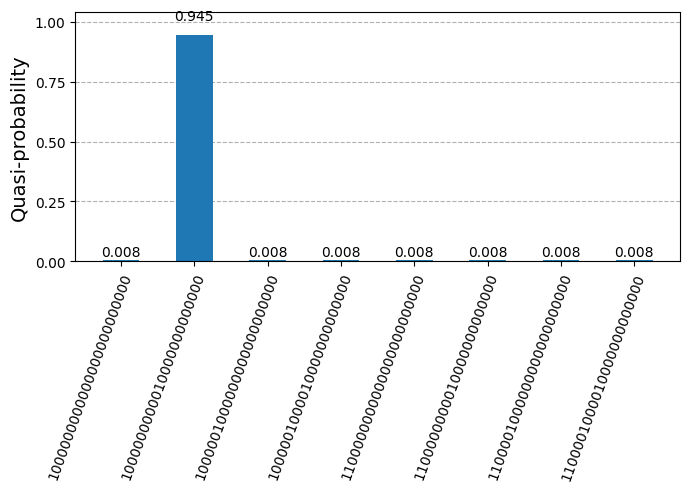

In [28]:
simulator = Aer.get_backend('statevector_simulator')
result=simulator.run(qc.decompose()).result()
counts = result.get_counts()
print("\nTotal count are:",counts)
plot_distribution(counts)

One marked state results in a solution after two iteration with a probability value 0.945.